## Bank Customer Churn Prediction

This project is the need for bank to identify and predict customer churn in order to implement effective retention strategies and maintain a stable customer base. Customer churn refers to the phenomenon where customers discontinue their banking services with a particular bank, leading to loss of revenue and potential negative impact on the bank profitability.

The bank wants to proactively identify customers who are likely to churn and take appropriate measures to retain them. By accurately predicting customer churn, the bank can allocate resources effectively, personalize retention strategies, and address customer concerns before they decide to leave. Additionally, identifying the factors that contribute to churn can help the bank improve its overall experience, enhance customer satisfaction, and increase customer loyalty. 


## Collect Data : Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score, precision_score

## Import Dataset

In [2]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [9]:
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("No.of customers in the data:",len(churn_data.index))

No.of customers in the data: 10000


In [5]:
print("No.of attributes in the data:",len(churn_data.columns))

No.of attributes in the data: 14


## Analyzing the Data

Creating different plot to check relationship between variables

<Axes: xlabel='Exited', ylabel='count'>

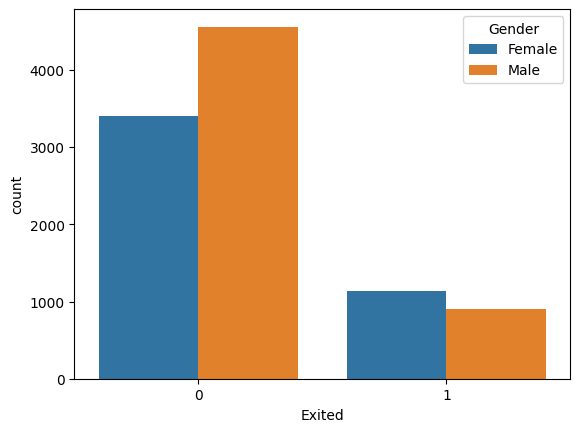

In [6]:
sns.countplot(x='Exited', hue='Gender' , data=churn_data)

<Axes: xlabel='Exited', ylabel='count'>

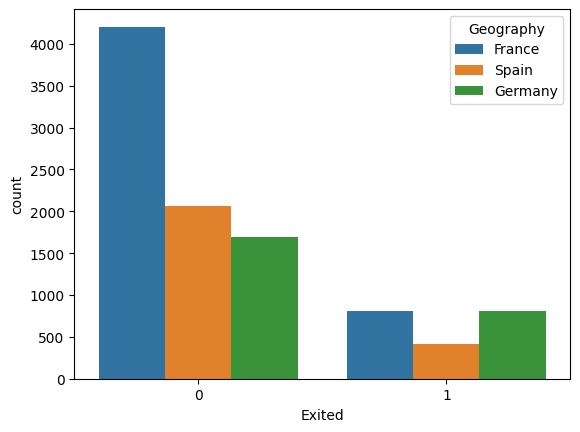

In [8]:
sns.countplot(x='Exited', hue='Geography' , data=churn_data)

<Axes: ylabel='Frequency'>

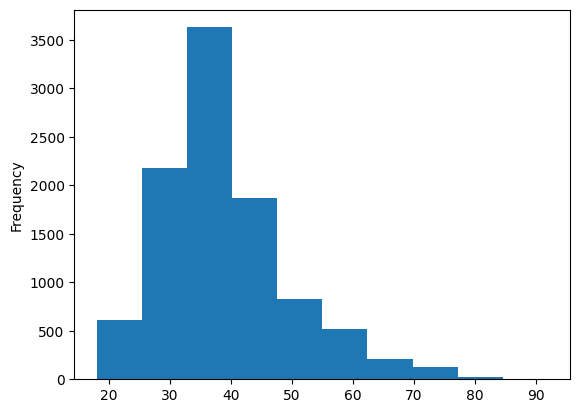

In [9]:
churn_data['Age'].plot.hist()

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In this data having 5 continuous variables and 9 categorical variables

In [11]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Wrangling

Clean the data by removing Nan values and unnecessary columns in the dataset

In [12]:
churn_data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

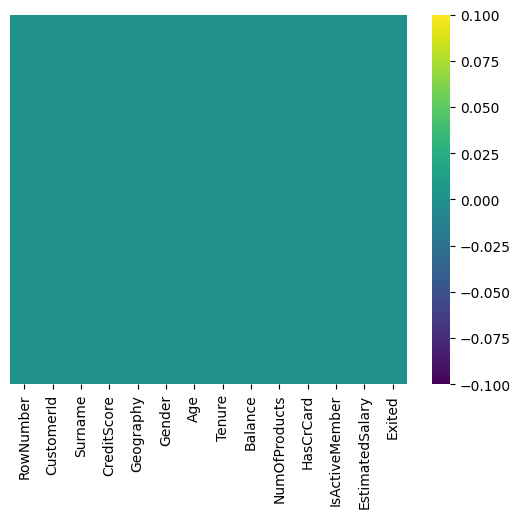

In [14]:
sns.heatmap(churn_data.isnull(),yticklabels=False,cmap="viridis")

This heatmap shows that in this dataset doesn't have any  null values are obtained.

In [15]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Finding unique values in the attributes

In [14]:
churn_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Feature Engineering

one hot encoding to transform categorical values into numeric.

In [15]:
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The first 3 rows are not necessary to predicting the values because it is a specific to customers and it's not affect the final outputs.So, will remove those attributes.

In [16]:
churn_data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [17]:
churn_data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
churn_data.select_dtypes(include=['object'])

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [19]:
Sex = pd.get_dummies(churn_data['Gender'],drop_first=True,dtype=int)
print(Sex)

      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [20]:
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
geography = pd.get_dummies(churn_data['Geography'],drop_first=True,dtype=int)
print(geography)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]


In [22]:
churn_data.drop(['Gender','Geography'],axis=1,inplace=True)

In [23]:
churn_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
churn_data = pd.concat([churn_data,Sex,geography],axis=1)

In [25]:
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Train and Test Data

Build the model on the train data and predict the value in the test data.

In [26]:
x = churn_data.drop(['Exited'],axis=1)
y = churn_data['Exited']

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=24)

# Data Preprocessing

In [28]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

##  LogisticRegression Model Building

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(xtrain, ytrain)

LogisticRegression()

In [31]:
prediction = log_model.predict(xtest)

In [32]:
classification_report(ytest,prediction)

'              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.89      2392\n           1       0.64      0.20      0.30       608\n\n    accuracy                           0.81      3000\n   macro avg       0.73      0.58      0.60      3000\nweighted avg       0.79      0.81      0.77      3000\n'

In [33]:
confusion_matrix(ytest,prediction)

array([[2325,   67],
       [ 489,  119]], dtype=int64)

Confusion matrix is the 2*2 matrix it shows that how accuracy the model is predicted the values.

# Accuracy Check

Accuracy to check how accurate the values are to be predicted

In [34]:
accuracy_score(ytest,prediction)

0.8146666666666667

## RandomForest Classifier 

In [36]:
x = churn_data.drop(['Exited'],axis=1)
y = churn_data['Exited']

## Splitting the Dataset into Training and Test Data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (8000, 11)
y_train: (8000,)
x_test: (2000, 11)
y_test: (2000,)


## Training Random Forest Classification on Training set

In [42]:
rf_model = RandomForestClassifier(n_estimators=5, criterion='entropy',random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

## Predicting the Test Results

In [43]:
predictions = rf_model.predict(x_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Confusion Matrix

In [45]:
cm = confusion_matrix(y_test, predictions)
cm

array([[1499,  108],
       [ 217,  176]], dtype=int64)

## Accuracy Check

In [46]:
accuracy_score(y_test, predictions)

0.8375

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.62      0.45      0.52       393

    accuracy                           0.84      2000
   macro avg       0.75      0.69      0.71      2000
weighted avg       0.82      0.84      0.83      2000



## Try with different number of trees and gini criteria

In [48]:
rf1_model = RandomForestClassifier(n_estimators=7, criterion='gini', random_state=0)
rf1_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [49]:
y_predict = rf1_model.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [50]:
accuracy_score(y_test, y_predict)

0.845

With more Trees the model gives more accuracy

## conclusion

In this study, To predict customer churn for a bank using two different machine learning algorithms: Random Forest Classifier and Logistic Regression. Through evaluation and analysis, we observed a significant difference in predictive performance between the two models, with the Random Forest Classifier demonstrating higher accuracy.